In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target

In [13]:
df = df.dropna() 
X = df.drop("target", axis=1)
y = df["target"]

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'SVM Confusion Matrix')

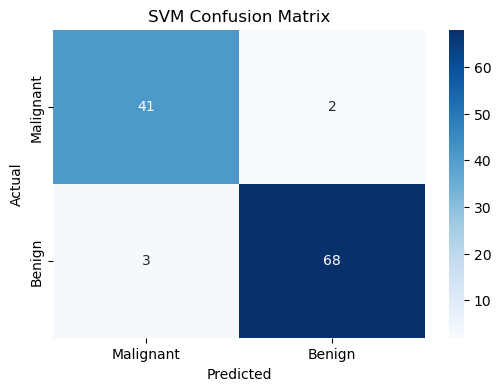

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")

In [22]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_accuracy = accuracy_score(y_test, log_model.predict(X_test))

In [23]:
print(f"SVM Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")

SVM Accuracy: 0.9561
Logistic Regression Accuracy: 0.9737
